<h1>This notebook will be mainly used for the capstone project</h1>


In [157]:
import pandas as pd
import numpy as np

In [158]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [159]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# # check for latest version of Matplotlib
# print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

In [160]:
df = pd.read_csv('Data-Collisions.csv')
print(df.shape)
print(df.head())

(194673, 38)
   SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  

In [161]:
df = df[['SEVERITYCODE','LOCATION','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]
df.head()

,SEVERITYCODE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,NaN
1,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,NaN
2,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,NaN
3,1,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN
4,2,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,2,At Intersection (intersection related),Raining,Wet,Daylight,NaN


In [162]:
dummy_variable_1 = pd.get_dummies(df["SEVERITYCODE"])
dummy_variable_1.rename(columns={1:'SEVERITYCODE 1', 2:'SEVERITYCODE 2'}, inplace=True)
dummy_variable_1.head()

,SEVERITYCODE 1,SEVERITYCODE 2
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [163]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
# df.drop("SEVERITYCODE", axis = 1, inplace=True)
df.head()

,SEVERITYCODE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE 1,SEVERITYCODE 2
0,2,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,NaN,0,1
1,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,NaN,1,0
2,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,NaN,1,0
3,1,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN,1,0
4,2,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,2,At Intersection (intersection related),Raining,Wet,Daylight,NaN,0,1


In [164]:
df_location = df[['LOCATION','SEVERITYCODE 1','SEVERITYCODE 2']].set_index(['LOCATION'])
print(df_location.head())
# df_top20 = df_location.groupby(by=['LOCATION']).size().to_frame(name='COUNT')
df_top20 = df_location.groupby(by=['LOCATION']).sum()
df_top20.sort_values(by=['SEVERITYCODE 1','SEVERITYCODE 2'], inplace=True, ascending=False)
df_top20 = df_top20.head(20)
df_top20

                                             SEVERITYCODE 1  SEVERITYCODE 2
LOCATION                                                                   
5TH AVE NE AND NE 103RD ST                                0               1
AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N                1               0
4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST               1               0
2ND AVE BETWEEN MARION ST AND MADISON ST                  1               0
SWIFT AVE S AND SWIFT AV OFF RP                           0               1


,SEVERITYCODE 1,SEVERITYCODE 2
LOCATION,,
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,198,78
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,185,86
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,175,63
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,171,94
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,151,88
6TH AVE AND JAMES ST,145,107
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP,144,68
1ST AVE BETWEEN BLANCHARD ST AND BELL ST,140,21
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,137,94


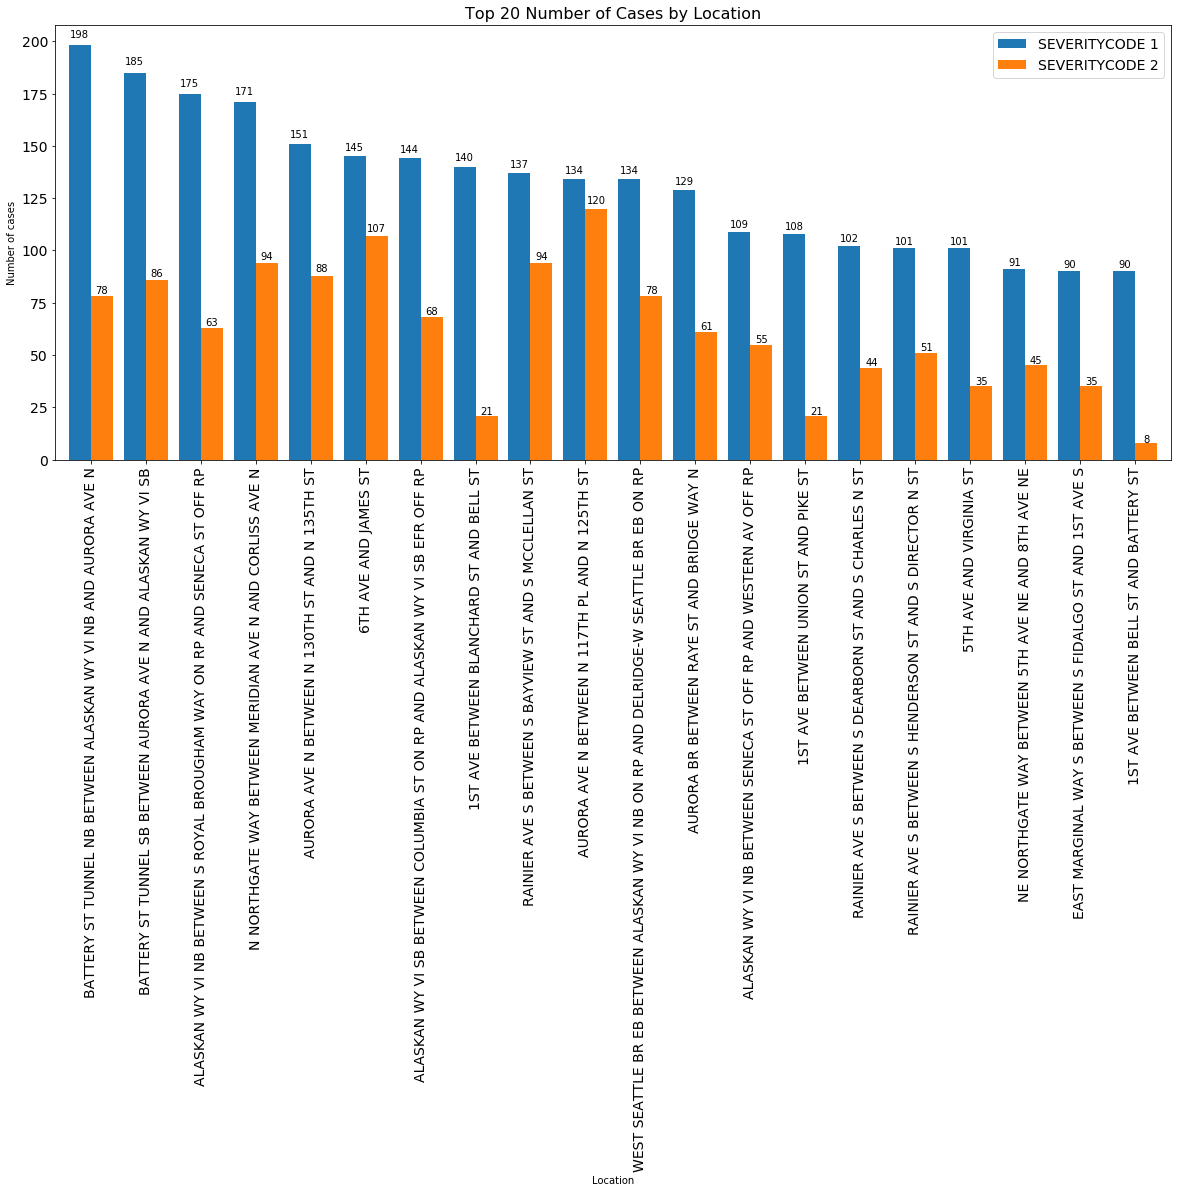

In [165]:
#top 20 locations of most cases happened
ax = df_top20.plot(kind='bar', figsize=(20,8), width=0.8,fontsize=14) 

plt.title("Top 20 Number of Cases by Location" ,fontsize=16)
plt.xlabel("Location")
plt.ylabel("Number of cases")
plt.legend(fontsize=14)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

In [166]:
df_weather = df.groupby(by=['WEATHER']).size().to_frame(name='COUNT')
df_weather

,COUNT
WEATHER,
Blowing Sand/Dirt,56
Clear,111135
Fog/Smog/Smoke,569
Other,832
Overcast,27714
Partly Cloudy,5
Raining,33145
Severe Crosswind,25
Sleet/Hail/Freezing Rain,113


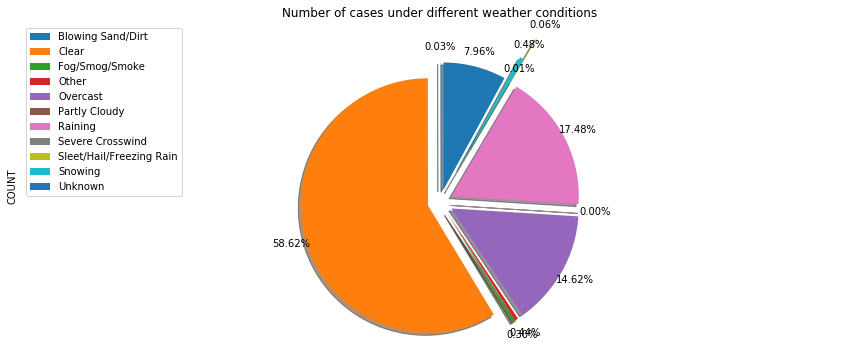

In [167]:
#pie chart of number of cases under weather conditions
# autopct create %, start angle represent starting point

explode_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.5,0.3,0.1] # ratio for each continent with which to offset each wedge.

df_weather['COUNT'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.2f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('Number of cases under different weather conditions')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_weather.index, loc='upper left') 

plt.show()

In [168]:
df_roadcond = df.groupby(by=['ROADCOND']).size().to_frame(name='COUNT')
df_roadcond

,COUNT
ROADCOND,
Dry,124510
Ice,1209
Oil,64
Other,132
Sand/Mud/Dirt,75
Snow/Slush,1004
Standing Water,115
Unknown,15078
Wet,47474


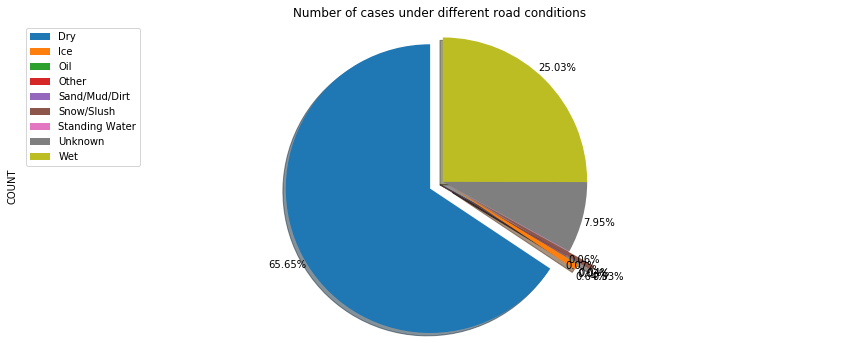

In [169]:
#pie chart of number of cases under road conditions
# autopct create %, start angle represent starting point

explode_list = [0.1, 0.1, 0.1, 0, 0.1, 0.2,0,0,0] # ratio for each continent with which to offset each wedge.

df_roadcond['COUNT'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.2f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('Number of cases under different road conditions')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_roadcond.index, loc='upper left') 

plt.show()

In [170]:
df_lightcond = df.groupby(by=['LIGHTCOND']).size().to_frame(name='COUNT')
df_lightcond

,COUNT
LIGHTCOND,
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Dark - Street Lights On,48507
Dark - Unknown Lighting,11
Dawn,2502
Daylight,116137
Dusk,5902
Other,235
Unknown,13473


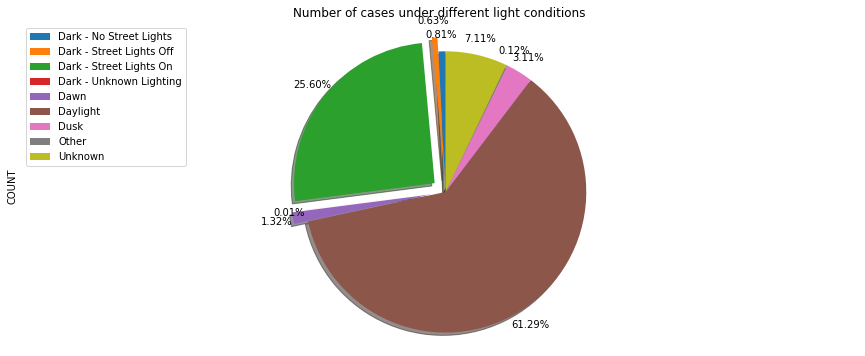

In [171]:
#pie chart of number of cases under road conditions
# autopct create %, start angle represent starting point

explode_list = [0, 0.1, 0.1, 0, 0.1, 0,0,0,0] # ratio for each continent with which to offset each wedge.

df_lightcond['COUNT'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.2f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('Number of cases under different light conditions')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_lightcond.index, loc='upper left') 

plt.show()

In [172]:
#count missing data in each column
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64

SEVERITYCODE 1
False    194673
Name: SEVERITYCODE 1, dtype: int64

SEVERITYCODE 2
False    194673
Name: SEVERITYCODE 2, dtype: int64



In [173]:
#check again
missing_data2 = df.isnull()
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64

SEVERITYCODE 1
False    194673
Name: SEVERITYCODE 1, dtype: int64

SEVERITYCODE 2
False    194673
Name: SEVERITYCODE 2, dtype: int64



In [174]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [175]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [176]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [177]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [178]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [179]:
#data analysis
df['SPEEDING'].fillna(0, inplace=True)
df.dropna(inplace=True)
df['SPEEDING'] = df['SPEEDING'].map({'Y':1,0:0})
df['WEATHER'] = df['WEATHER'].map({'Clear':1,'Raining':2,'Overcast':3,'Unknown':4,'Snowing':5,'Other':6,\\
                'Fog/Smog/Smoke':7,'Sleet/Hail/Freezing Rain':8,'Blowing Sand/Dirt':9,'Severe Crosswind':10,'Partly Cloudy':11})
df['ROADCOND'] = df['ROADCOND'].map({'Dry':1,'Wet':2,'Unknown':3,'Ice':4,'Snow/Slush':5,'Other':6,'Standing Water':7,\\
                'Sand/Mud/Dirt':8,'Oil':9})
df['LIGHTCOND'] = df['LIGHTCOND'].map({'Daylight':1,'Dark - Street Lights On':2,'Unknown':3,'Dusk':4,\\
                'Dawn':5,'Dark - No Street Lights':6,'Dark - Street Lights Off':7,'Other':8,'Dark - Unknown Lighting':9})
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].map({'Other':1,'Rear Ended':2,'Parked Car':3,'Angles':4,'Sideswipe':5,\\
                    'Head On':6,'Left Turn':7,'Cycles':8,'Pedestrian':9,'Right Turn':10})
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].map({'Mid-Block (not related to intersection)':1,\\
                    'At Intersection (intersection related)':2,'Mid-Block (but intersection related)':3,\\
                    'Driveway Junction':4,'At Intersection (but not related to intersection)':5,'Ramp Junction':6,'Unknown':7})
df.head()

,SEVERITYCODE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE 1,SEVERITYCODE 2
0,2,5TH AVE NE AND NE 103RD ST,Injury Collision,4,2,2,2,3,2,1,0,0,1
1,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,5,2,2,1,2,2,2,0,1,0
2,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,3,4,3,1,3,1,1,0,1,0
3,1,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,1,3,3,1,1,1,1,0,1,0
4,2,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,4,2,2,2,2,2,1,0,0,1


In [180]:
#check again
missing_data2 = df.isnull()
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("")

SEVERITYCODE
False    182660
Name: SEVERITYCODE, dtype: int64

LOCATION
False    182660
Name: LOCATION, dtype: int64

SEVERITYDESC
False    182660
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    182660
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    182660
Name: PERSONCOUNT, dtype: int64

VEHCOUNT
False    182660
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    182660
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    182660
Name: WEATHER, dtype: int64

ROADCOND
False    182660
Name: ROADCOND, dtype: int64

LIGHTCOND
False    182660
Name: LIGHTCOND, dtype: int64

SPEEDING
False    182660
Name: SPEEDING, dtype: int64

SEVERITYCODE 1
False    182660
Name: SEVERITYCODE 1, dtype: int64

SEVERITYCODE 2
False    182660
Name: SEVERITYCODE 2, dtype: int64



In [181]:
df.dtypes

SEVERITYCODE       int64
LOCATION          object
SEVERITYDESC      object
COLLISIONTYPE      int64
PERSONCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE       int64
WEATHER            int64
ROADCOND           int64
LIGHTCOND          int64
SPEEDING           int64
SEVERITYCODE 1     uint8
SEVERITYCODE 2     uint8
dtype: object

In [182]:
import seaborn as sns

In [183]:
df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']].corr()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
SEVERITYCODE,1.000000,-0.087758,-0.085993,-0.067481,0.035006
WEATHER,-0.087758,1.000000,0.598166,0.219478,0.027065
ROADCOND,-0.085993,0.598166,1.000000,0.225276,0.094837
LIGHTCOND,-0.067481,0.219478,0.225276,1.000000,0.033432
SPEEDING,0.035006,0.027065,0.094837,0.033432,1.000000


In [184]:
df_model = df[['COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']].astype('str')
X = df_model.values
X[0:5]

array([['4', '2', '2', '2', '3', '2', '1', '0'],
       ['5', '2', '2', '1', '2', '2', '2', '0'],
       ['3', '4', '3', '1', '3', '1', '1', '0'],
       ['1', '3', '3', '1', '1', '1', '1', '0'],
       ['4', '2', '2', '2', '2', '2', '1', '0']], dtype=object)

In [185]:
y = df['SEVERITYCODE'].astype('str').values
y[0:5]



array(['2', '1', '1', '1', '2'], dtype=object)

In [186]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (146128, 8) (146128,)
Test set: (36532, 8) (36532,)


In [187]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [188]:
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)

In [189]:
print (predTree [0:5])
print (y_test [0:5])

['1' '1' '1' '1' '1']
['1' '1' '1' '1' '1']


In [190]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7424176064819884


In [191]:
from sklearn.metrics import f1_score
f1_score(y_test, predTree, average='weighted')

0.7118740432316062

In [192]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, predTree)

C:\Users\songl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7424176064819884

In [193]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [194]:
#visualization
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\Users\songl\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [195]:
df_model.columns[0:8]

Index(['COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'SPEEDING'],
      dtype='object')

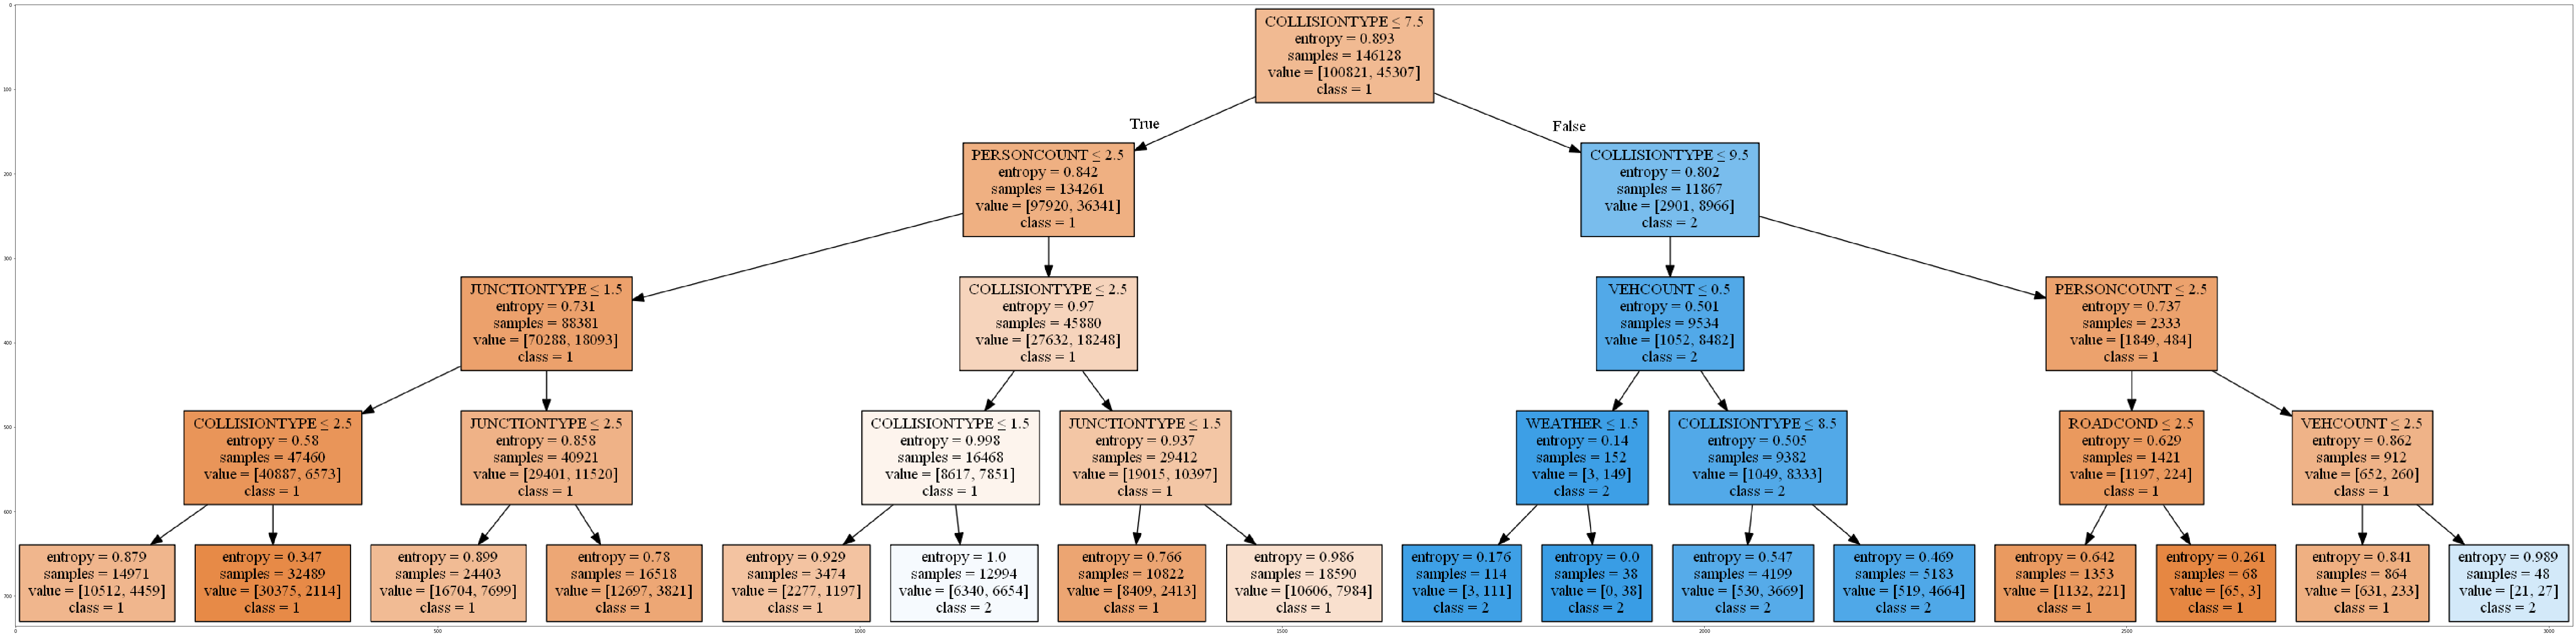

In [196]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df_model.columns[0:8]
targetNames = df["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')